# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [1]:
# H_0 = the new email template will have the same response rate as the current template, which is 5%. 

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [2]:
# H_1 = is that the new email template will have a higher response rate than the current template, with an increase of 1%. 

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [3]:
# Calculate the required sample size
import math
from statsmodels.stats.power import TTestIndPower

# Define response rates and parameters
p1 = 0.05  # current response rate
p2 = 0.06  # new response rate
alpha = 0.05  # significance level
power = 0.8  # desired power

# Calculate pooled standard deviation
sigma = math.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 2)

# Calculate Cohen's d
d = abs(p1 - p2) / sigma

# Initialize power analysis object
power_analysis = TTestIndPower()

# Calculate required sample size per group and round up
sample_size_per_group = power_analysis.solve_power(effect_size=d, alpha=alpha, power=power, alternative='larger')
sample_size_per_group_rounded = math.ceil(sample_size_per_group)

# Output the required sample size per group
print("Required sample size per group:", sample_size_per_group_rounded)


Required sample size per group: 6425


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

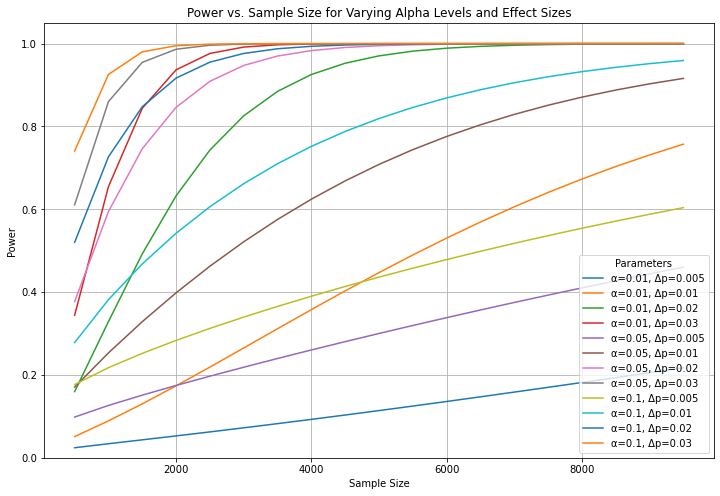

In [4]:
#Your code; plot power curves for the various alpha and effect size combinations
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Parameters for the plot
alpha_levels = [0.01, 0.05, 0.1]  # different alpha levels to test
effect_sizes = [0.005, 0.01, 0.02, 0.03]  # response rate differences
p1 = 0.05  # current response rate
power_analysis = TTestIndPower()

# Sample size range
sample_sizes = np.arange(500, 10000, 500)

# Create the plot
plt.figure(figsize=(12, 8))

# Generate power curves for each alpha and effect size
for alpha in alpha_levels:
    for delta_p in effect_sizes:
        # Calculate Cohen's d for each delta_p
        p2 = p1 + delta_p
        sigma = np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 2)
        d = abs(p1 - p2) / sigma
        
        # Calculate power for each sample size
        power = [power_analysis.solve_power(effect_size=d, nobs1=n, alpha=alpha, alternative='larger') 
                 for n in sample_sizes]
        
        # Plot the power curve
        label = f"α={alpha}, Δp={delta_p}"
        plt.plot(sample_sizes, power, label=label)

# Configure plot aesthetics
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power vs. Sample Size for Varying Alpha Levels and Effect Sizes')
plt.legend(title="Parameters")
plt.grid(True)
plt.ylim(0, 1.05)

# Show plot
plt.show()


## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [5]:
"""To test whether a new email template outperforms the current one, we’ll conduct an A/B test with approximately 6,425 individuals per group (totaling 12,850), aiming to detect a 1% increase in response rate with a significance level of 0.05 and 80% power.

Groups: Randomized control (current template) vs. test group (new template).
Primary Metric: Response rate.
Advantages:

Balanced sample size with strong power to detect meaningful changes.
Limits sales risk by testing with a manageable audience size.
Considerations:

Detecting smaller than 1% improvements might require a larger sample.
Time and resource commitment may be high if response rates remain low.

Recommendation: This design offers a strong balance of statistical power and practicality, enabling a confident assessment of the new template’s effectiveness before wider rollout.






"""

'To test whether a new email template outperforms the current one, we’ll conduct an A/B test with approximately 6,425 individuals per group (totaling 12,850), aiming to detect a 1% increase in response rate with a significance level of 0.05 and 80% power.\n\nGroups: Randomized control (current template) vs. test group (new template).\nPrimary Metric: Response rate.\nAdvantages:\n\nBalanced sample size with strong power to detect meaningful changes.\nLimits sales risk by testing with a manageable audience size.\nConsiderations:\n\nDetecting smaller than 1% improvements might require a larger sample.\nTime and resource commitment may be high if response rates remain low.\n\nRecommendation: This design offers a strong balance of statistical power and practicality, enabling a confident assessment of the new template’s effectiveness before wider rollout.\n\n\n\n\n\n\n'

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.